In [1357]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [1358]:
data = pd.read_csv("anime_clean.csv", encoding="utf8")
data.head()

,anime_id,anime_url,title,synopsis,main_pic,type,source_type,num_episodes,status,start_date,...,score_08_count,score_07_count,score_06_count,score_05_count,score_04_count,score_03_count,score_02_count,score_01_count,clubs,pics
0,2366,https://myanimelist.net/anime/2366/Touma_Kishi...,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4940,https://myanimelist.net/anime/4940/Sabaku_no_K...,Sabaku no Kaizoku! Captain Kuppa,Sometime in the future,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50285,https://myanimelist.net/anime/50285/On_Air_Dek...,On Air Dekinai!,Set in 2014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3975,https://myanimelist.net/anime/3975/Uchi_no_3_S...,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36036,https://myanimelist.net/anime/36036/Running_Man,Running Man,The Soul Tree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean Data

In [1359]:
data = data.dropna(subset=['genres'])
data = data.dropna(subset=['source_type'])
data = data.dropna(subset=['studios'])
data = data.dropna(subset=['score'])
data.isnull().sum()


anime_id                  0
anime_url                 0
title                     0
synopsis                  1
main_pic                  0
type                      0
source_type               0
num_episodes             21
status                    0
start_date                0
end_date                 27
season                 1721
studios                   0
genres                    0
score                     0
score_count               0
score_rank              309
popularity_rank           0
members_count             0
favorites_count           0
watching_count            0
completed_count           0
on_hold_count             0
dropped_count             0
plan_to_watch_count       0
total_count               0
score_10_count            0
score_09_count            0
score_08_count            0
score_07_count            0
score_06_count            0
score_05_count            0
score_04_count            0
score_03_count            0
score_02_count            0
score_01_count      

In [1360]:
data.head()

,anime_id,anime_url,title,synopsis,main_pic,type,source_type,num_episodes,status,start_date,...,score_08_count,score_07_count,score_06_count,score_05_count,score_04_count,score_03_count,score_02_count,score_01_count,clubs,pics
696,39572,https://myanimelist.net/anime/39572/Wangu_Xian...,Wangu Xian Qiong III: Eren Gu Pian,Third season of .,https://cdn.myanimelist.net/images/anime/1873/...,TV,Novel,13.0,Finished Airing,3/8/2019 0:00,...,25.0,53.0,28.0,11.0,6.0,5.0,4.0,1.0,42215|78730,https://cdn.myanimelist.net/images/anime/1873/...
732,4504,https://myanimelist.net/anime/4504/Kinkyuu_Has...,Kinkyuu Hasshin Saver Kids,Matsugorou is a vile doctor who plots out a pl...,https://cdn.myanimelist.net/images/anime/10/88...,TV,Original,50.0,Finished Airing,2/19/1991 0:00,...,20.0,46.0,32.0,26.0,12.0,4.0,1.0,4.0,7373|5441|19782,https://cdn.myanimelist.net/images/anime/4/861...
739,3114,https://myanimelist.net/anime/3114/Chiisana_Ky...,Chiisana Kyojin Microman,3 kids meet 5 micro-sized superheroes from ano...,https://cdn.myanimelist.net/images/anime/1058/...,TV,Other,52.0,Finished Airing,1/4/1999 0:00,...,12.0,48.0,36.0,27.0,12.0,6.0,7.0,4.0,7373|17397|11712|70786,https://cdn.myanimelist.net/images/anime/4/474...
740,2741,https://myanimelist.net/anime/2741/Monkey_Turn_V,Monkey Turn V,Sequel to .,https://cdn.myanimelist.net/images/anime/4/752...,TV,Manga,25.0,Finished Airing,7/4/2004 0:00,...,25.0,32.0,29.0,13.0,8.0,5.0,3.0,4.0,149|33601,https://cdn.myanimelist.net/images/anime/4/752...
742,44273,https://myanimelist.net/anime/44273/Mewkledrea...,Mewkledreamy Mix!,Second season of .,https://cdn.myanimelist.net/images/anime/1313/...,TV,Other,50.0,Currently Airing,4/11/2021 0:00,...,24.0,35.0,17.0,16.0,5.0,3.0,1.0,4.0,27907,https://cdn.myanimelist.net/images/anime/1610/...


In [1361]:
scaler = MinMaxScaler()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = data[['score','genres','studios']].copy()

df_with_id = data[['anime_id','title','score','genres','studios']].copy()

df['score'] = scaler.fit_transform(df[['score']])
df['genres'] = df['genres'].str.replace('|',', ')
df['genres'] = df['genres'].str.split(', ')
df = df.explode('genres')

df_with_id['score'] = scaler.fit_transform(df_with_id[['score']])
df_with_id['genres'] = df_with_id['genres'].str.replace('|',', ')
df_with_id['genres'] = df_with_id['genres'].str.split(', ')
df_with_id = df_with_id.explode('genres')


df['genres'] = le.fit_transform(df['genres'])
df['studios'] = le.fit_transform(df['studios'])

df_with_id['genres'] = le.fit_transform(df_with_id['genres'])
df_with_id['studios'] = le.fit_transform(df_with_id['studios'])

# df = pd.get_dummies(df, columns=["genres", "studios"])

df['score'].describe()



count    5585.000000
mean        0.697540
std         0.125112
min         0.000000
25%         0.620968
50%         0.709677
75%         0.791935
max         1.000000
Name: score, dtype: float64

In [1362]:
print(len(df))
print(len(df_with_id))

5585
5585


In [1363]:
df.isnull().count()
# df.head()

score      5585
genres     5585
studios    5585
dtype: int64

In [1364]:
df

,score,genres,studios
696,0.724194,1,17
696,0.724194,5,17
696,0.724194,10,17
732,0.653226,0,379
732,0.653226,1,379
...,...,...,...
13375,0.793548,8,1
13377,0.695161,1,338
13377,0.695161,5,338
13377,0.695161,10,338


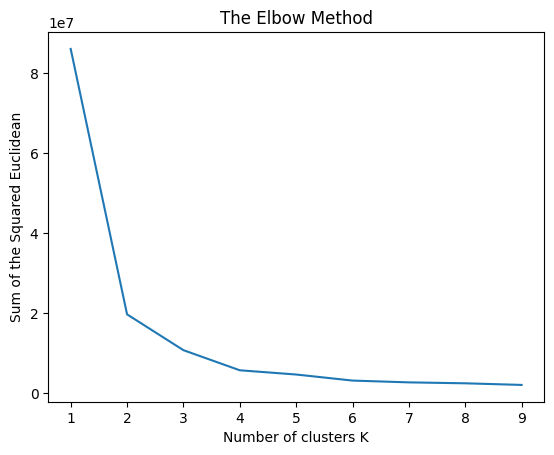

In [1365]:
k_meansclus = range(1,10)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(df)
  sse.append(km.inertia_)

plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

In [1366]:
model = KMeans(n_clusters=3)
model.fit(df)

KMeans(n_clusters=3)

In [1367]:
from sklearn.metrics import silhouette_score
silhouette_score(df, model.labels_)

0.5785344827825313

In [1368]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(df, model.labels_)
print(dbs)

0.5305170026581916


In [1369]:
df_with_id.head()


,anime_id,title,score,genres,studios
696,39572,Wangu Xian Qiong III: Eren Gu Pian,0.724194,1,17
696,39572,Wangu Xian Qiong III: Eren Gu Pian,0.724194,5,17
696,39572,Wangu Xian Qiong III: Eren Gu Pian,0.724194,10,17
732,4504,Kinkyuu Hasshin Saver Kids,0.653226,0,379
732,4504,Kinkyuu Hasshin Saver Kids,0.653226,1,379


In [1370]:
new_point = np.array([[0.724194, 1, 17]])
nearest_cluster  = model.predict(new_point)

# labels = model.cluster_
# cluster_0_data = df[labels == 0]
# cluster_1_data = df[labels == 1]

cluster_centroids = model.cluster_centers_

centroid_0_data =  df[cluster_centroids == cluster_centroids[0]]
centroid_1_data = df[cluster_centroids[1]]
centroid_2_data = df[cluster_centroids[2]]

print(cluster_centroids)

# Get the centroids of all clusters

# Find the centroid closest to the new point
closest_centroid = cluster_centroids[nearest_cluster]

print("New point:", new_point)
print("Closest centroid:", closest_centroid)

val = df_with_id[(df_with_id['score'] == closest_centroid[0][0]) & (df_with_id['genres'] == closest_centroid[0][1]) & (df_with_id['studios'] == closest_centroid[0][2])]

print(val)
target_cluster_label = 1

# # Filter the data points belonging to the target cluster label
# sample_data = df[cluster_labels == target_cluster_label]

# pred_pd = pd.merge(sample_data, df_with_id[['score', 'genres', 'anime_id', 'title']], on=['score', 'genres'], how='left')
# print("Sample data from cluster", target_cluster_label, ":")
# print(new_point[0])

c:\Users\chiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: Item wrong length 3 instead of 5585.

In [ ]:
merged_df = pd.merge(df, df_with_id[['score', 'genres', 'anime_id', 'title']], on=['score', 'genres'], how='left')
merged_df

,score,genres,studios,anime_id,title
0,0.724194,1,17,39572,Wangu Xian Qiong III: Eren Gu Pian
1,0.724194,5,17,39572,Wangu Xian Qiong III: Eren Gu Pian
2,0.724194,5,17,13377,Recorder to Randoseru Re♪
3,0.724194,5,17,4075,Super Robot Taisen OG: Divine Wars - Sorezore ...
4,0.724194,5,17,32511,Girls & Panzer: Nihon Senshadou Renmei News
...,...,...,...,...,...
12658,0.695161,5,338,26019,Rokujouma no Shinryakusha!?
12659,0.695161,5,338,33142,Re:Zero kara Hajimeru Break Time
12660,0.695161,10,338,4190,Harukanaru Toki no Naka de 3: Kurenai no Tsuki...
12661,0.695161,10,338,33142,Re:Zero kara Hajimeru Break Time
